In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from processing_functions import *

df = pd.read_csv('data/SpeedDatingData.csv', encoding='latin1')

Let's start by changing the empty spaces by nan values to have a clear image of the dataset. Since most of these columns have '?' as the nan value, they  have mismatched datatypes, being objects where they should be ints or floats.
Therefore I decided to create a function to change the column to its corresponding datatype.

In [2]:
df.applymap(convert_to_numeric).replace('?', np.nan, inplace=True)

In [3]:
#df.info(verbose=True)

In [4]:
df.select_dtypes(include='object')

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
1,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
2,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
3,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
4,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
...,...,...,...,...,...,...,...,...
8373,Climate Dynamics,"Ecole Normale Suprieure, Paris",NaN,NaN,France,"78,110",NaN,assistant master of the universe (otherwise it...
8374,Climate Dynamics,"Ecole Normale Suprieure, Paris",NaN,NaN,France,"78,110",NaN,assistant master of the universe (otherwise it...
8375,Climate Dynamics,"Ecole Normale Suprieure, Paris",NaN,NaN,France,"78,110",NaN,assistant master of the universe (otherwise it...
8376,Climate Dynamics,"Ecole Normale Suprieure, Paris",NaN,NaN,France,"78,110",NaN,assistant master of the universe (otherwise it...


Check percentage of nan values per column. To make life easier I decided to define a function to return the corresponding percentage for each column.

In [5]:
# nan_percentage(df) 
# will probably delete some rows if the provided information is null

During the experiment they devided the speed dating events in three steps. First step consisted on asking the participants questions based on their initial thoughts on the selected attributes, how they perceive themselves, how they perceive the others, what is the most important attribute, etc.Since I will be only be taking into account first impressions (simulating a dating app) I will remove the data observed after the dates themselves.(explain the column names and why the selected ones for this case are) 

In [6]:
filtered_columns = [
    col for col in df.columns if not col.endswith('_2') 
    and not col.endswith('_3')
    and not col.endswith('_s')
]
# Select only the filtered columns
df_filtered = df[filtered_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 111 entries, iid to them_cal
dtypes: float64(90), int64(13), object(8)
memory usage: 7.1+ MB


Now we have in total 111 columns that center more around the actual dates
I am going to rename the columns associated to rankings to have a clear 
understanding of which is which isntead of having it associated with numbers

In [7]:
rename_suffix = [
    ('1_1', '_important'),
    ('2_1', '_o_want'),
    ('3_1', '_self'),
    ('4_1', '_fellow_want'),
    ('5_1', '_perceived')
]

df_renamed = rename_columns(df_filtered, rename_suffix)
columns = df_renamed.columns
#columns.to_list()

Since 'field' has too many unique values, we'll drop it. It is not that important either for this research

In [8]:
# Each participant provided information about their field that was later encoded with a number.
# Let's check which fields we have (we will not be using this since they are not relevant for this study,
# but it is still useful to know what we are working with.

fields = df_renamed.groupby('field_cd').agg({
    'field': lambda x: ','.join(x.drop_duplicates().astype(str)),
    'iid': 'nunique'
}).reset_index()

fields.columns = ['Field encoded', 'Fields', 'Participants count']
display(fields)

,Field encoded,Fields,Participants count
0,1.0,"Law,law,LAW,Law and Social Work,Law and Englis...",48
1,2.0,"Economics,Mathematics,Statistics,math,Mathemat...",14
2,3.0,"Psychology,Speech Language Pathology,Speech La...",46
3,4.0,"Medicine,Art History/medicine,Sociomedical Sci...",9
4,5.0,"Operations Research,Mechanical Engineering,Eng...",56
5,6.0,"MFA Creative Writing,Classics,Journalism,Engli...",21
6,7.0,"German Literature,Religion,philosophy,History ...",17
7,8.0,"Finance,Business,money,Applied Maths/Econs,Eco...",130
8,9.0,"TC (Health Ed),Elementary/Childhood Education ...",40
9,10.0,"chemistry,microbiology,Chemistry,Climate-Earth...",61


In [9]:
#df_renamed['field'].value_counts(normalize=True) 
df_renamed.drop(['field'], axis=1)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,fun,amb,shar,like,prob,met,match_es,length,you_call,them_cal
0,1,1.0,0,1,1,1,10,7,NaN,4,...,7.0,6.0,5.0,7.0,6.0,2.0,4.0,2.0,1.0,1.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,8.0,5.0,6.0,7.0,5.0,1.0,4.0,2.0,1.0,1.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,8.0,5.0,7.0,7.0,NaN,1.0,4.0,2.0,1.0,1.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,7.0,6.0,8.0,7.0,6.0,2.0,4.0,2.0,1.0,1.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,7.0,6.0,6.0,6.0,6.0,2.0,4.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,5.0,NaN,NaN,2.0,5.0,0.0,3.0,1.0,2.0,0.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,4.0,4.0,NaN,4.0,4.0,0.0,3.0,1.0,2.0,0.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,8.0,NaN,6.0,5.0,0.0,3.0,1.0,2.0,0.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,4.0,NaN,5.0,5.0,5.0,0.0,3.0,1.0,2.0,0.0


In some of the waves they implement a different way of rating by attributes:


Waves 6-9: rate the importance of the attributes in a potential date on a scale of 1-10 (1 = not at all important, 10 = extremely important):


Waves 1-5, 10-21: 100 point saro distribtdde among teg attributse,  more point sare given  to those attributes that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100.

In order to have more objective ratings, I decided to design a function that would change the 100 points ranking system for the importance rating in a scale from 1 to 6.


In [10]:
def attribute_ranking(row, attribute_groups):
    """
    Ranks attribute points directly in the original columns based on their importance, with tie-breaking.
    Fills NaN values with 0 before ranking and applies a small random noise to break ties.
    
    Parameters:
    - row: A single row (Series) from DataFrame.
    - attribute_columns: List of columns containing attribute points to be ranked.
    - wave_column: The column indicating the wave to check for specific ranking rules.
    
    Returns:
    - A modified row with uniquely ranked attributes.
    """
    for attribute_columns in attribute_groups:
        row[attribute_columns] = row[attribute_columns].fillna(0)
        
        # Add a small random noise to break ties
        noise = np.random.normal(0, 0.01, len(attribute_columns))
        noisy_attributes = row[attribute_columns] + noise
        
        # Rank the attributes, lower number means more important
        ranks = noisy_attributes.rank(method='first', ascending=False).astype(int)  # 'first' to handle ties by order of appearance
    
        row[attribute_columns] = ranks

    return row

attribute_columns = [
    'attr_important',
    'sinc_important',
    'intel_important',
    'fun_important',
    'amb_important',
    'shar_important',
    'shar_important',
    'attr_fellow_want',
    'sinc_fellow_want',
    'intel_fellow_want',
    'fun_fellow_want',
    'amb_fellow_want',
    'shar_fellow_want',
    'attr_o_want',
    'sinc_o_want',
    'intel_o_want',
    'fun_o_want',
    'amb_o_want',
    'shar_o_want',
    'attr_self', 
    'sinc_self', 
    'intel_self', 
    'fun_self', 
    'amb_self',
    'attr_perceived', 
    'sinc_perceived', 
    'intel_perceived', 
    'fun_perceived', 
    'amb_perceived',
]

In [11]:
attribute_groups = [
    ['attr_important', 'sinc_important', 'intel_important', 'fun_important', 'amb_important', 'shar_important'],
    ['attr_fellow_want', 'sinc_fellow_want', 'intel_fellow_want', 'fun_fellow_want', 'amb_fellow_want', 'shar_fellow_want'],
    ['attr_o_want', 'sinc_o_want', 'intel_o_want', 'fun_o_want', 'amb_o_want', 'shar_o_want'],
    ['attr_self', 'sinc_self', 'intel_self', 'fun_self', 'amb_self'],
    ['attr_perceived', 'sinc_perceived', 'intel_perceived', 'fun_perceived', 'amb_perceived']
]

df = df_renamed.apply(lambda row: attribute_ranking(row, attribute_groups), axis=1)

In [36]:
df[['attr_important', 'sinc_important', 'intel_important', 'fun_important', 'amb_important', 'shar_important']].value_counts()

attr_important  sinc_important  intel_important  fun_important  amb_important  shar_important
1               4               2                3              5              6                 151
                                3                2              5              6                 146
                                                                6              5                 136
                3               4                2              6              5                 111
                4               2                3              6              5                 103
                                                                                                ... 
                5               6                4              2              3                   1
                                                 3              4              2                   1
5               1               6                2              3              4                  

In [12]:
#df.columns.to_list()

## Plots

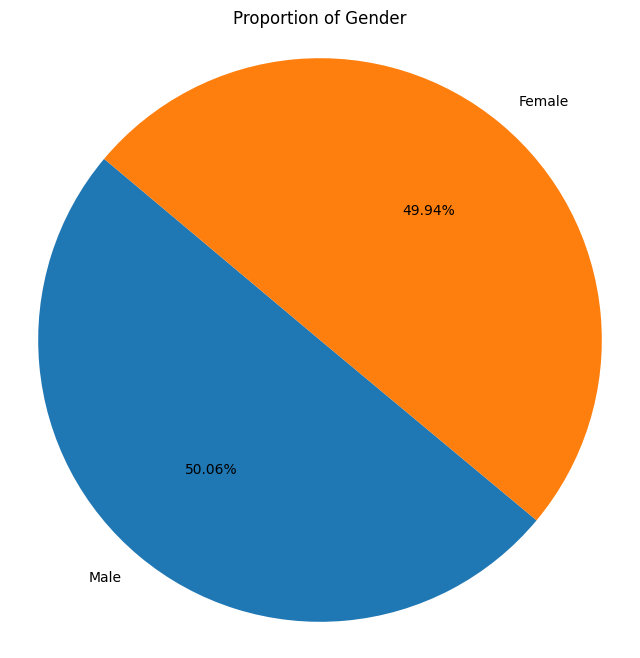

In [13]:
## Gender
gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%.2f%%', startangle=140)
plt.title('Proportion of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

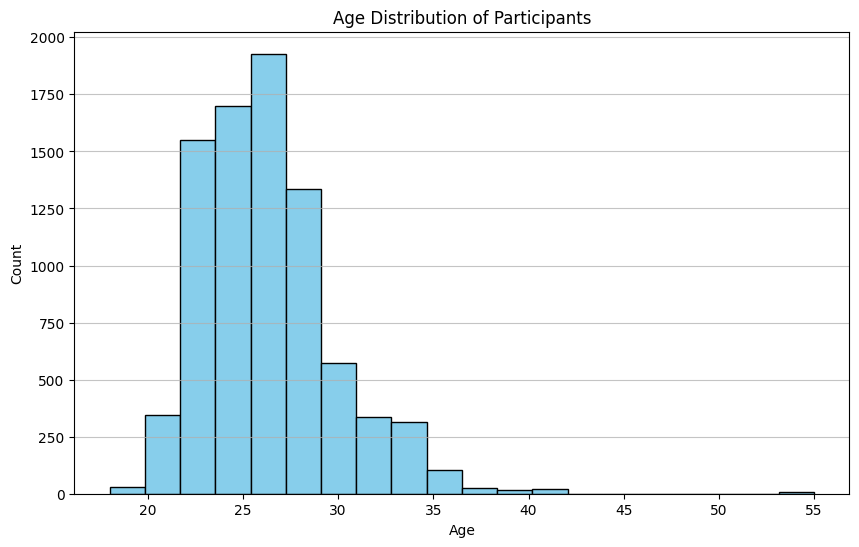

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

For a clearer and narrower understanding of the age values:

  Age Range  Percentage
0       <20        0.36
1     20-24       33.30
2     25-29       49.50
3     30-34       14.75
4     35-39        1.77
5     40-44        0.24
6     45-49        0.00
7       >50        0.07


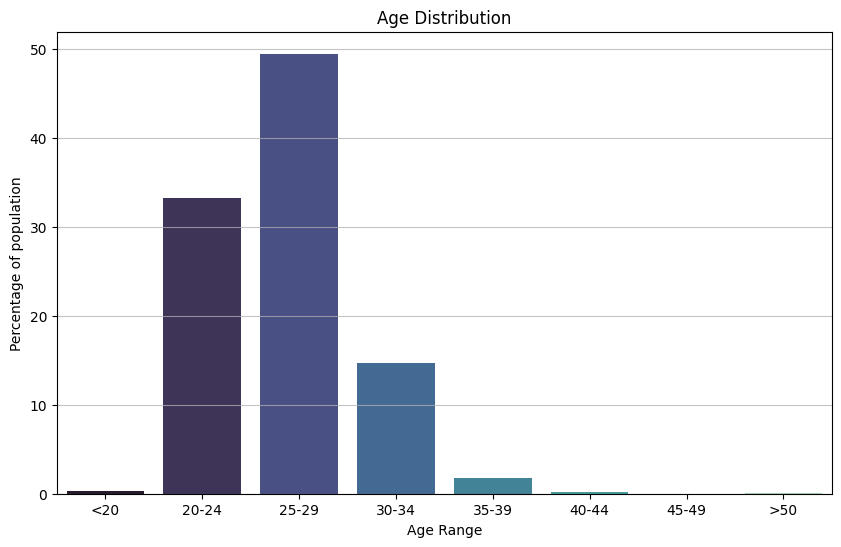

In [15]:
def age_distribution(df):
    """
    Calculate the percentage of people's ages within 5-year gaps.

    Parameters:
    - df: Pandas DataFrame containing the age data.
    - age_column: The name of the column in the DataFrame that contains age data.

    Returns:
    - A DataFrame with each 5-year age gap and the corresponding percentage 
    of people within that range.
    """
    df['age'] = df['age'].dropna()
    
    bins = [0, 20, 25, 30, 35, 40, 45, 50, 60] 
    labels = ['<20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '>50']

    # Use pandas cut to categorize each age into bins
    binned_ages = pd.cut(df['age'], bins=bins, labels=labels, right=False, include_lowest=True)

    age_distribution = binned_ages.value_counts(normalize=True).sort_index() * 100

    age_distribution_df = age_distribution.reset_index()
    age_distribution_df.columns = ['Age Range', 'Percentage']

    return age_distribution_df.round(2)


age_dist = age_distribution(df_renamed)
print(age_dist)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Range', y='Percentage', data=age_dist, palette='mako')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Percentage of population')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [61]:
df_ranked = df_renamed.apply(lambda row: attribute_ranking(row, attribute_groups), axis=1)
df_ranked['gender'] = df_ranked['gender'].map({'Female': 0, 'Male': 1})

actual_attribute_names = ['attr_important', 'sinc_important', 'intel_important', 'fun_important', 'amb_important', 'shar_important']
df_melted = df.melt(id_vars=['gender'], value_vars=actual_attribute_names, var_name='attribute', value_name='rank')

rank_counts = df_melted.groupby(['gender', 'attribute', 'rank']).size().unstack(fill_value=0)

rank                       1     2     3     4     5     6
gender attribute                                          
0      amb_important     247   348   601   891   949  1148
       attr_important    683   599   548   665   882   807
       fun_important     652   924   804   809   654   341
       intel_important  1350  1110   818   556   277    73
       shar_important    200   372   527   669   936  1480
       sinc_important   1052   831   886   594   486   335
1      amb_important      72    99   182   534  1249  2058
       attr_important   1910   849   563   484   250   138
       fun_important     460  1088   913  1011   529   193
       intel_important   996  1134  1025   619   308   112
       shar_important    201   343   528   589  1256  1277
       sinc_important    555   681   983   957   602   416

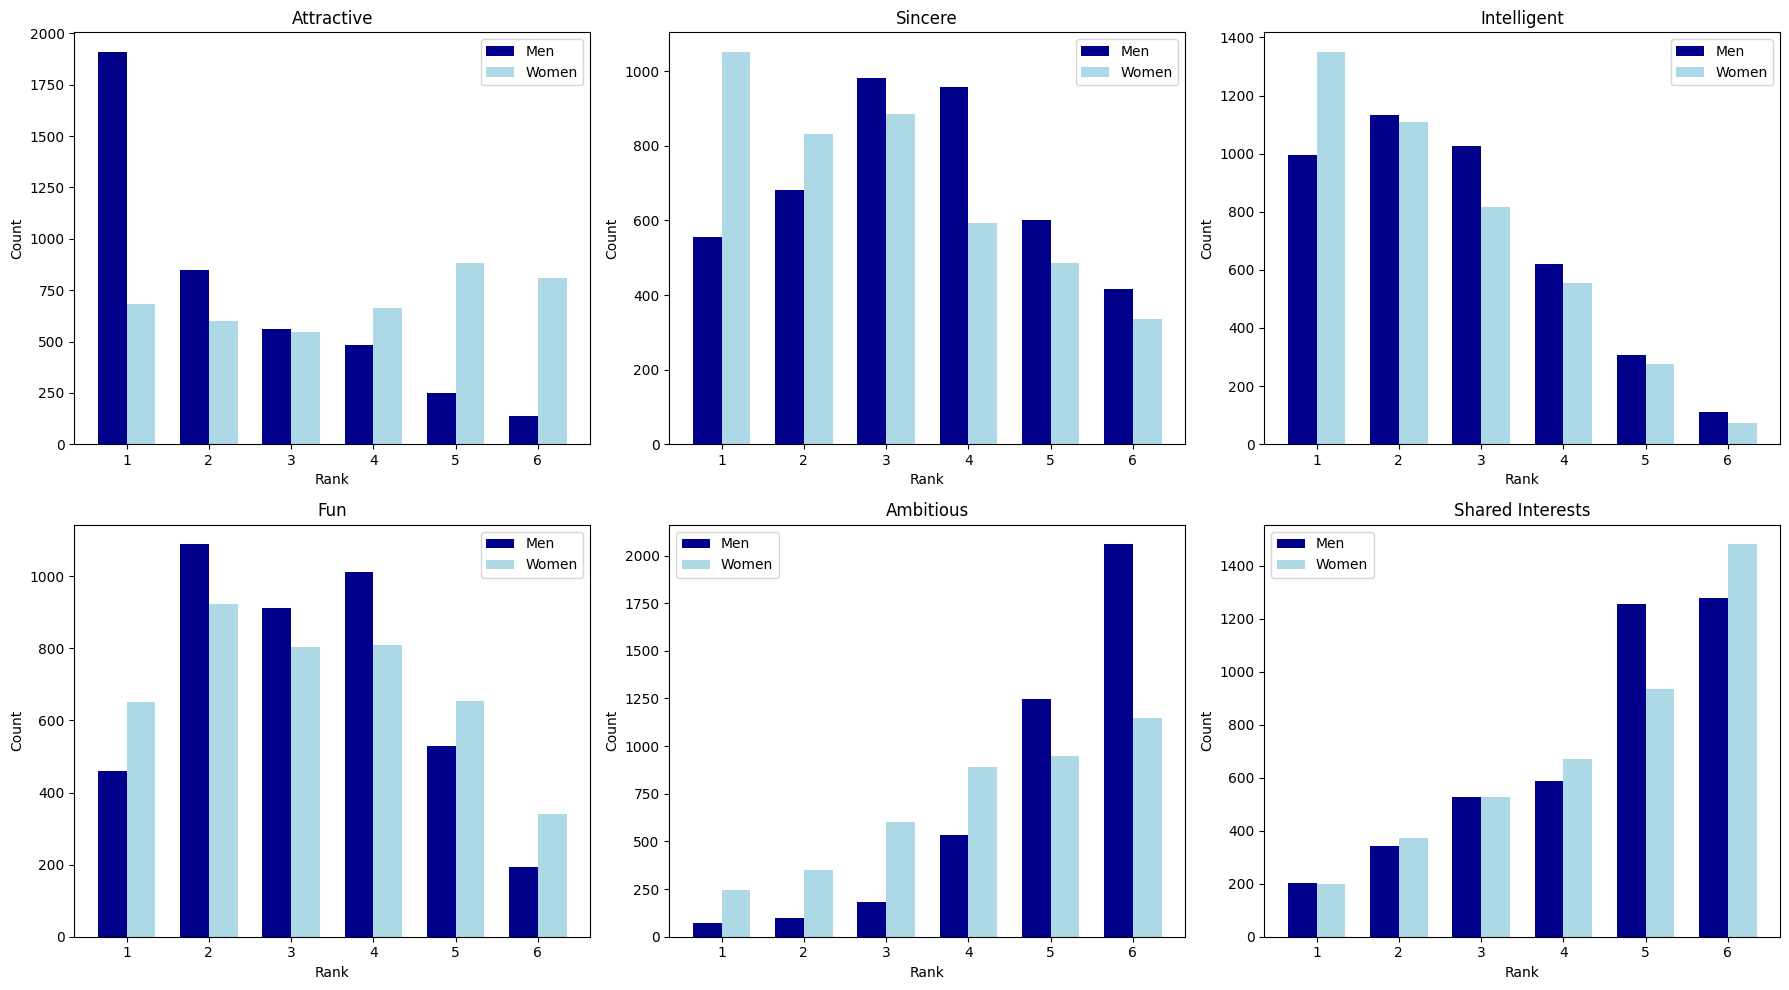

In [63]:
# Defining rank_labels for the plots
rank_labels = [1, 2, 3, 4, 5, 6]

# Let's recreate the subplot with the correct rank_labels
# Creating a subplot for each attribute
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Adjust the layout according to the number of attributes
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Looping through each attribute by its actual name and plotting the rank counts for each gender
for i, actual_name in enumerate(actual_attribute_names):
    ax = axes[i]
    
    # Male data for this attribute
    male_data = rank_counts.loc[1, actual_name].fillna(0)
    ax.bar(np.arange(6) - bar_width/2, male_data, bar_width, label='Men', color='darkblue')
    
    # Female data for this attribute
    female_data = rank_counts.loc[0, actual_name].fillna(0)
    ax.bar(np.arange(6) + bar_width/2, female_data, bar_width, label='Women', color='lightblue')

    ax.set_title(cols[i])  # Using the human-readable names from `cols`
    ax.set_xlabel('Rank')
    ax.set_ylabel('Count')
    ax.set_xticks(np.arange(6))
    ax.set_xticklabels(rank_labels)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

# Now, rank_labels and gender adjustments are correctly used in the plot.


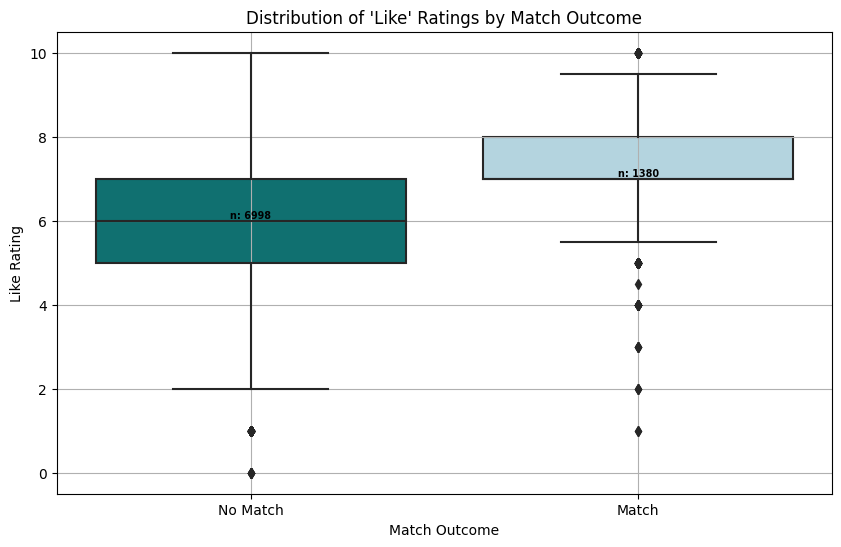

In [38]:
plt.figure(figsize=(10, 6))
# Use custom palette to clearly differentiate match outcomes
palette = {0: "teal", 1: "lightblue"}  # Assuming 'match' column has binary values 0 (No Match) and 1 (Match)
box = sns.boxplot(x='match', y='like', data=df, palette=palette)
plt.title("Distribution of 'Like' Ratings by Match Outcome")
plt.xlabel('Match Outcome')
plt.ylabel('Like Rating')
plt.grid(True)

# Adding custom tick labels
box.set_xticklabels(['No Match', 'Match'])

# Adding text annotations inside the plot
medians = df.groupby(['match'])['like'].median().values
nobs = df['match'].value_counts().values
pos = range(len(nobs))
for tick, label in zip(pos, box.get_xticklabels()):
    box.text(pos[tick], medians[tick] + 0.05, 'n: {}'.format(nobs[tick]),
             horizontalalignment='center', size='x-small', color='black', weight='semibold')

plt.show()

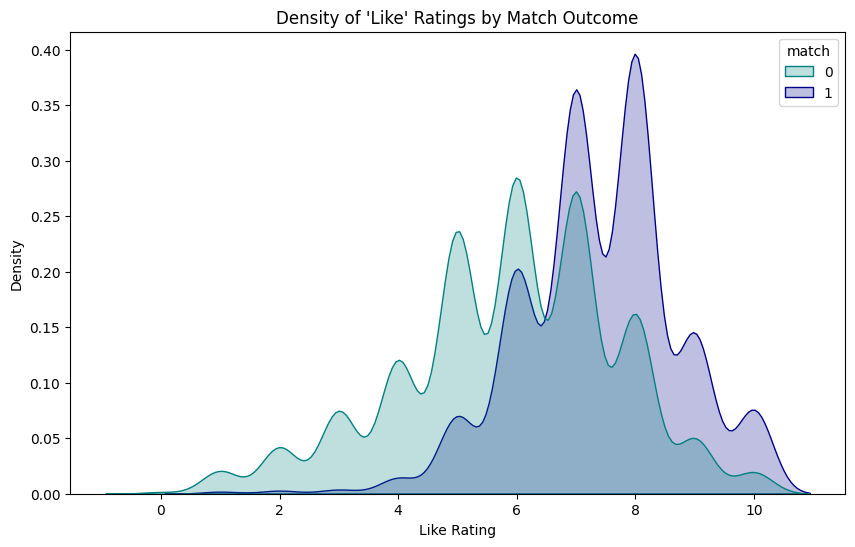

In [18]:
plt.figure(figsize=(10, 6))

# Plot density for each match outcome
sns.kdeplot(data=df, x='like', hue='match', fill=True, common_norm=False, palette={0: "teal", 1: "darkblue"})

# Set title and labels
plt.title("Density of 'Like' Ratings by Match Outcome")
plt.xlabel("Like Rating")
plt.ylabel("Density")

plt.show()

Participants who ended up matching (1) generally gave higher 'like' ratings than those who didn't match (0). The 'like' ratings for matches are more tightly clustered, as indicated by the narrower box and lack of outliers, suggesting a consensus on the likability of matches. In contrast, 'like' ratings for no matches are more spread out, showing that participants' opinions varied more widely when they did not find a match.

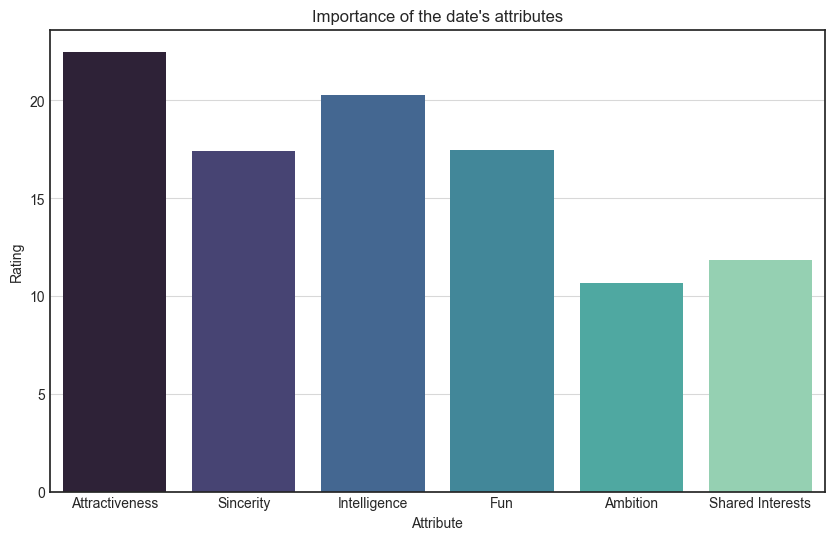

In [19]:
preferences = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']
avg_preferences = df[preferences].mean()

labels = {
    'pf_o_att': 'Attractiveness',
    'pf_o_sin': 'Sincerity',
    'pf_o_int': 'Intelligence',
    'pf_o_fun': 'Fun',
    'pf_o_amb': 'Ambition',
    'pf_o_sha': 'Shared Interests'
}

avg_preferences.rename(index=labels, inplace=True)
avg_preferences = avg_preferences.reset_index()
avg_preferences.columns = ['attribute', 'average_rating']

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='attribute', y='average_rating', data=avg_preferences, palette='mako')
    plt.title("Importance of the date's attributes")
    plt.xlabel('Attribute')
    plt.ylabel('Rating')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

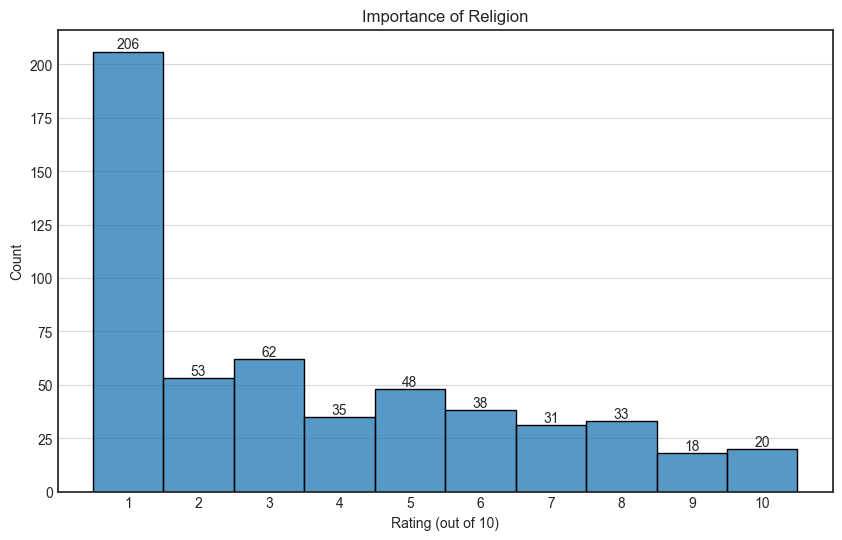

In [20]:
# Religion Importance
# This will show how participants rated the importance of religion, 
# I think this is an important factor when it comes to matching so we will take it into account when applying the algorithm
df_sorted = df.sort_values(by=['iid'])
df_unique = df_sorted.drop_duplicates(subset='iid').dropna(subset=['imprelig'])

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(df_unique['imprelig'], bins=10, edgecolor='black', kde=False)
    ax.set(title='Importance of Religion',
           xlabel='Rating (out of 10)',
           ylabel='Count')
    plt.grid(axis='y', linestyle='-', alpha=0.75)

    # bin centers and counts
    counts, bin_edges = np.histogram(df_unique['imprelig'], bins=10)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    plt.xticks(bin_centers, labels=[f"{int(center)}" for center in np.round(bin_centers)])

    # count of people above each bar
    for count, center in zip(counts, bin_centers):
        ax.text(center, count, str(count), ha='center', va='bottom')

    plt.show()


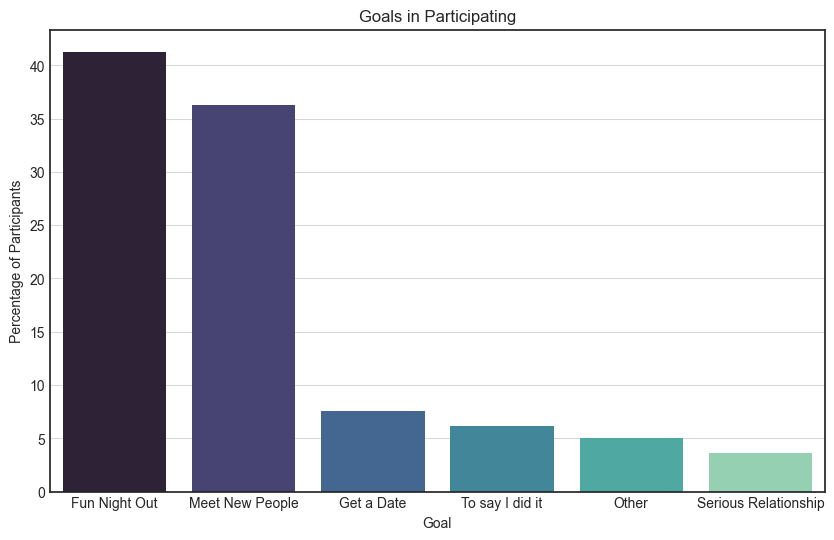

In [21]:
# Goals in participating
# Illustrating participants' goals in joining the speed dating event.

goals = df['goal'].value_counts(normalize=True).mul(100)
labels = {
    1: 'Fun Night Out',
    2: 'Meet New People',
    3: 'Get a Date',
    4: 'Serious Relationship',
    5: 'To say I did it',
    6: 'Other'
}

goals.rename(index=labels, inplace=True)
goals = goals.reset_index()
goals.columns = ['goal', 'percentage']

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='goal', y='percentage', data=goals, palette='mako')
    plt.title('Goals in Participating')
    plt.xlabel('Goal')
    plt.ylabel('Percentage of Participants')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

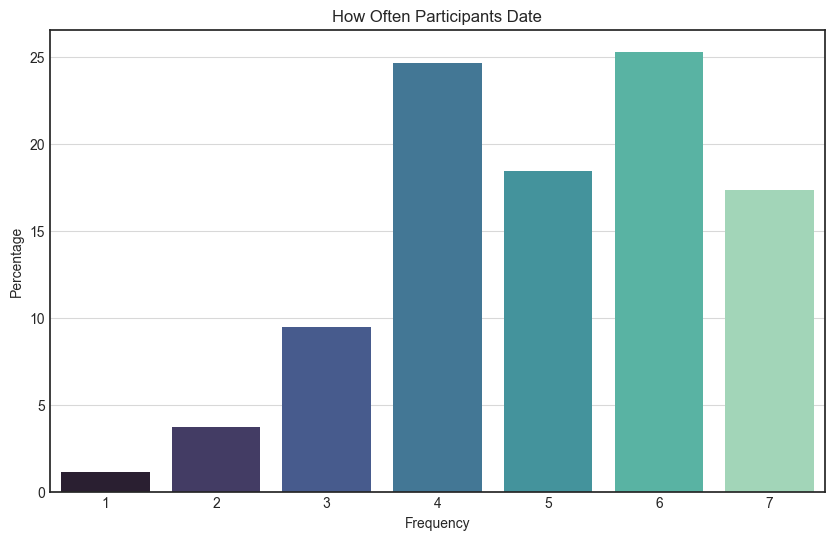

In [22]:
df['date'] = pd.Categorical(df['date'], categories=[1, 2, 3, 4, 5, 6, 7], ordered=True)

date_frequency = df['date'].value_counts(normalize=True, sort=False).mul(100).reset_index()
date_frequency.columns = ['date', 'percentage']

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='date', y='percentage', data=date_frequency, palette='mako')
    plt.title('How Often Participants Date')
    plt.xlabel('Frequency')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

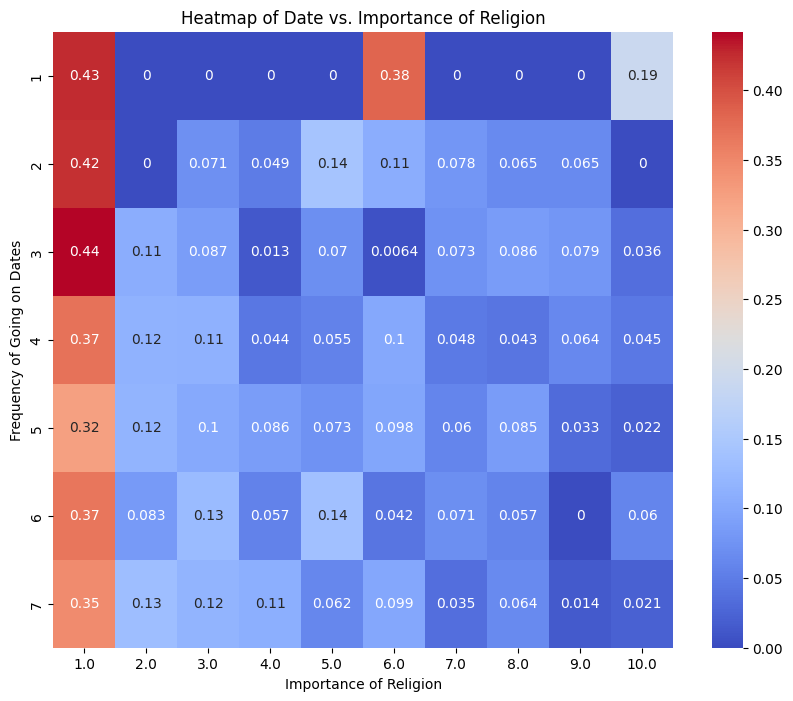

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_crosstab = pd.crosstab(df['date'], df['imprelig'], normalize='index')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_crosstab, annot=True, cmap='coolwarm')
plt.title('Heatmap of Date vs. Importance of Religion')
plt.xlabel('Importance of Religion')
plt.ylabel('Frequency of Going on Dates')
plt.show()

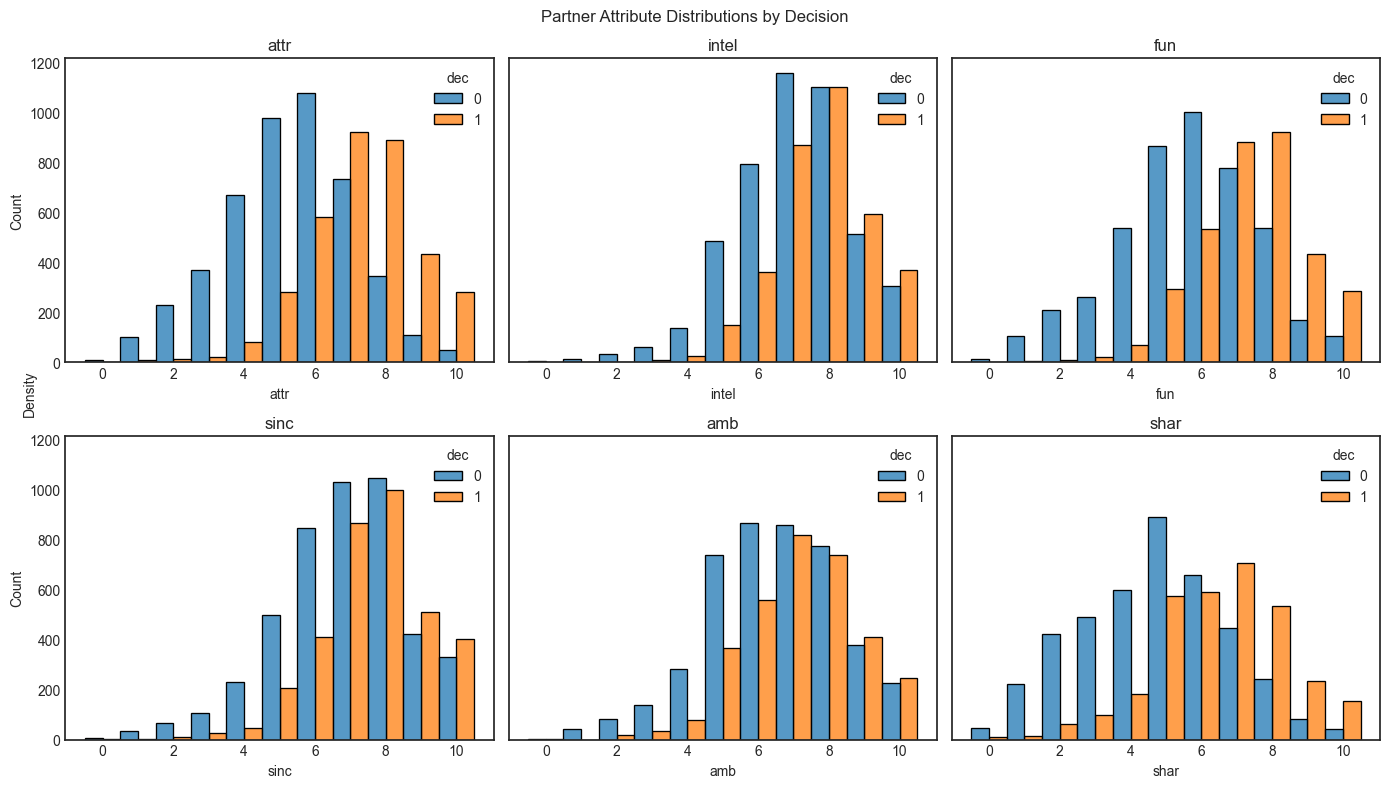

In [24]:
attributes = ['attr','intel','fun','sinc','amb', 'shar']

with plt.style.context('seaborn-white'):
    fig, axes = plt.subplots(2, 3, sharey=True, figsize=(14, 8))  # Adjust figsize for better aspect ratio
    fig.text(0.02, 0.5, 'Density', va='center', rotation='vertical')
    fig.suptitle('Partner Attribute Distributions by Decision')

    # Iterate over the attributes and plot on the appropriate subplot
    for n, attribute in enumerate(attributes):
        row, col = divmod(n, 3)  # Calculate row and column index
        ax = axes[row, col]  # Select the correct subplot
        sns.histplot(df, x=attribute, ax=ax, discrete=True, hue='dec', multiple='dodge')
        #ax.set_ylabel(' ')  # Clear the y-label if desired
        ax.set_title(attribute)  # Optionally set a title for each subplot

    plt.tight_layout()
    plt.show()

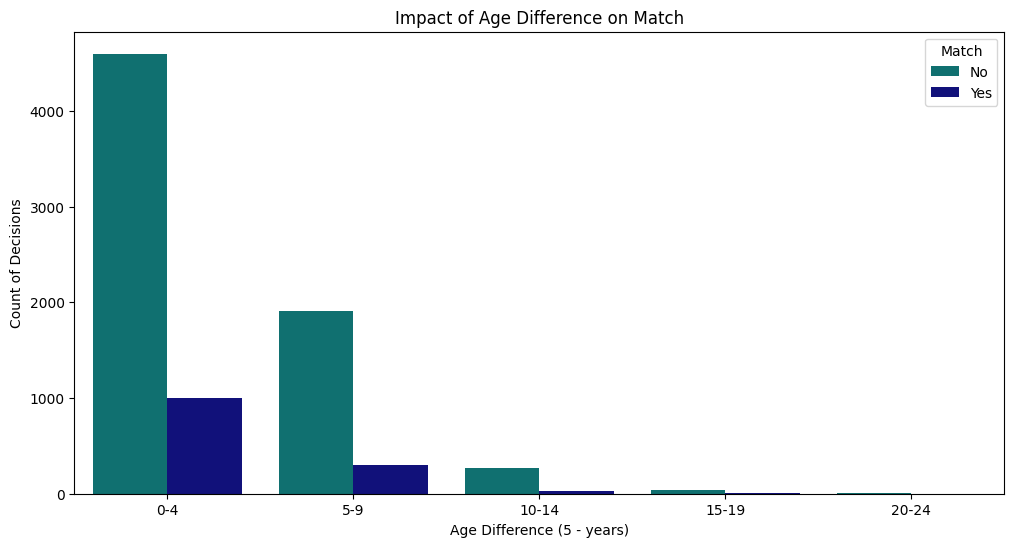

In [25]:
df['age_diff'] = (df['age'] - df['age_o']).abs()

df['age_diff'] = pd.cut(df['age_diff'], bins=np.arange(0, 26, 5), right=False, labels=[f'{i}-{i+4}' for i in range(0, 25, 5)])
palette

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_diff', hue='match', palette={0: "teal", 1: "darkblue"})
plt.title('Impact of Age Difference on Match')
plt.xlabel('Age Difference (5 - years)')
plt.ylabel('Count of Decisions')
plt.xticks(rotation=0)
plt.legend(title='Match', labels=['No', 'Yes'])
plt.show()

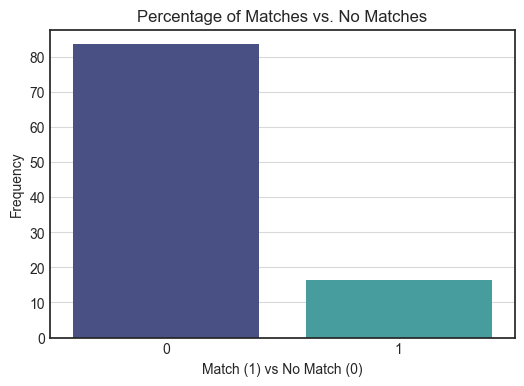

In [26]:
match = df['match'].value_counts(normalize=True).mul(100).reset_index()

match.columns = ['match', 'percentage']

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(6, 4))
    sns.barplot(x='match', y='percentage', data=match, palette='mako')
    plt.title('Percentage of Matches vs. No Matches')
    plt.xlabel('Match (1) vs No Match (0)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

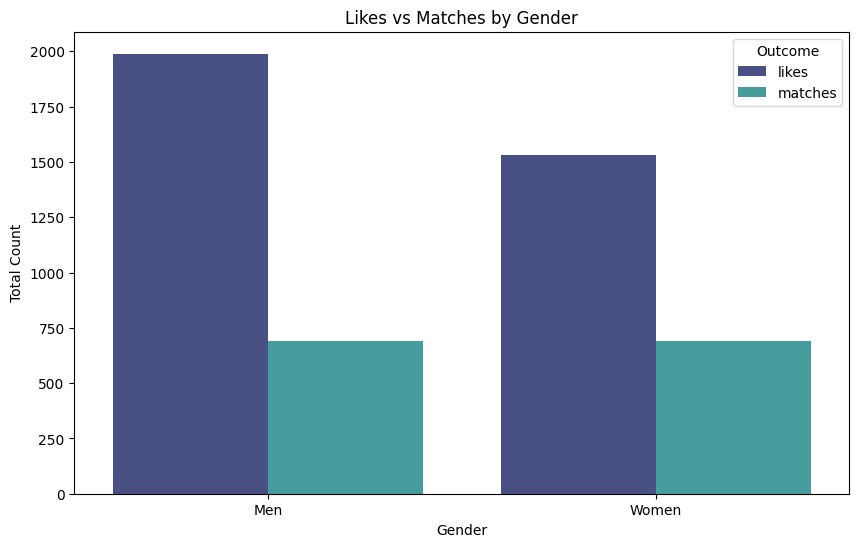

In [27]:
# likes_matches = df.groupby('gender').agg({'dec': 'sum', 'match': 'sum'})
# likes_matches['gender'] = ['Women', 'Men']

# plt.figure(figsize=(10, 6))
# index = np.arange(2)

# bar1 = plt.bar(index, likes_matches['dec'], bar_width, label='Likes', color='teal')
# bar2 = plt.bar(index + bar_width, likes_matches['match'], bar_width, label='Matches', color='lightblue')

# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.title('Likes and Matches by Gender')
# plt.xticks(index + bar_width / 2, ('Women', 'Men'))
# plt.legend()
# plt.tight_layout()
# plt.grid(axis='y', alpha=0.75, linestyle = '-.')
# plt.show()

df_renamed['gender'] = df_renamed['gender'].map({0: 'Women', 1: 'Men'})
match_df = df_renamed.groupby('gender').agg(likes=('dec', 'sum'), matches=('match', 'sum')).reset_index()
match_df = match_df.melt(id_vars='gender', var_name='Match', value_name='Count')

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='Count', hue='Match', data=match_df, palette='mako')
plt.title('Likes vs Matches by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.legend(title='Outcome')
plt.show()

In [28]:
#df.info(verbose=True)

Based on the description of each column it will be more useful to drop some columsn that will not be necessary for our experiment:

In [29]:
df_final = df.drop([
    'gender', 
    'idg', 
    'round',
    'condtn',
    'from',
    'position', 
    'positin1', 
    'order', 
    'samerace',
    'race_o',
    'field',
    'field_cd', 
    'undergra',
    'mn_sat',
    'tuition',
    'race',
    'imprace',
    'zipcode',
    'income',
    'career',
    'career_c',
    'length',
    'met',
    'met_o',
    'match_es',
    'you_call',
    'them_cal',
], axis=1)

df_final.to_csv('data/input_file.csv')

In [30]:
df_final.columns

Index(['iid', 'id', 'wave', 'partner', 'pid', 'match', 'int_corr', 'age_o',
       'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
       'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
       'like_o', 'prob_o', 'age', 'imprelig', 'goal', 'date', 'go_out',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
       'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr_important',
       'sinc_important', 'intel_important', 'fun_important', 'amb_important',
       'shar_important', 'attr_fellow_want', 'sinc_fellow_want',
       'intel_fellow_want', 'fun_fellow_want', 'amb_fellow_want',
       'shar_fellow_want', 'attr_o_want', 'sinc_o_want', 'intel_o_want',
       'fun_o_want', 'amb_o_want', 'shar_o_want', 'attr_self', 'sinc_self',
       'fun_self', 'intel_self', 'amb_self', 'attr_perceived',
       'sinc_perceived', 'intel_perceived',